In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
def generate_circle_sample_data(r, n, sigma):
    """Generates circle data with random gaussian noise."""
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    
    return x, y

def generate_concentric_circles_data(r_list, n_list, sigma_list):
    coordinates = [ 
        generate_circle_sample_data(r_list[i], n_list[i], sigma_list[i])
     for i in range(0, len(r_list))
    ]
    return coordinates

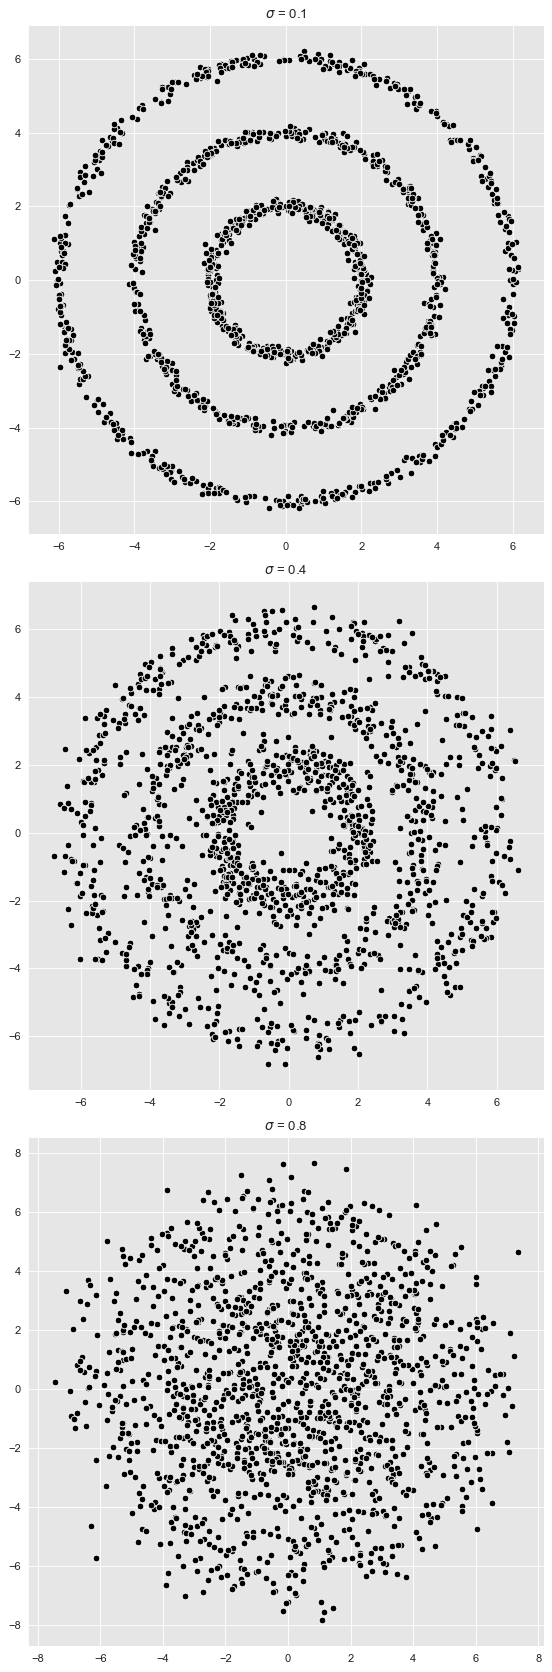

In [56]:
# Set global plot parameters. 
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 80

r_list =[2, 4, 6]
n = 500
n_list = [n]*3

sigmas = [0.1, 0.4, 0.8]

fig, axes = plt.subplots(3, 1, figsize=(7, 21))

for i, sigma in enumerate(sigmas):

    coordinates = generate_concentric_circles_data(r_list, n_list, [sigma]*len(r_list))
    
    ax =axes[i]
    
    for j in range(0, len(coordinates)):
    
        x, y = coordinates[j]
    
        sns.scatterplot(x=x, y=y, ax=ax, color='k')
        ax.set(title=f'$\sigma$ = {sigma}')

plt.tight_layout()

In [133]:
coordinates = generate_concentric_circles_data(r_list, n_list, [0.3]*len(r_list))

In [134]:
from functools import reduce

def data_frame_from_coordinates(coordinates): 
    
    data_df = reduce(
        lambda x, y: pd.concat([x, y], axis=0),  
        [pd.DataFrame({'x': c[0], 'y': c[1]}) for c in coordinates]
    )
    
    return data_df

In [135]:
data_df = data_frame_from_coordinates(coordinates)

In [136]:
from sklearn.neighbors import kneighbors_graph

nn = 5

adjacency_matrix_s = kneighbors_graph(X=data_df, n_neighbors=nn)

In [137]:
from scipy import sparse
graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
graph_laplacian = graph_laplacian_s.toarray()

In [138]:
from scipy import linalg
eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [139]:
#eigenvals, eigenvcts = sparse.linalg.eigs(A=graph_laplacian_s, k=200)

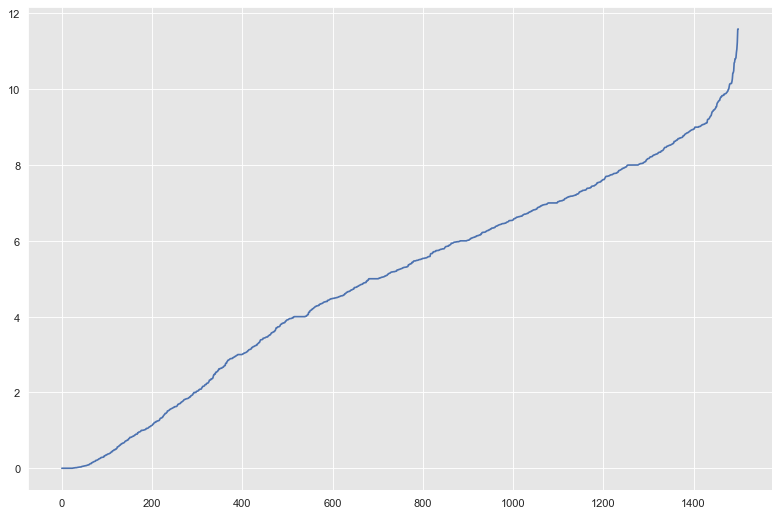

In [153]:
eigenvals.sort()

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x=list(range(0, eigenvals.size)), y=np.real(eigenvals), ax=ax)